[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Examples 11.36 and 11.43

Analysis of a synthetic dataset consisting of movie ratings\
Topics: Low rank model, singular value decomposition, matrix completion, singular-value thresholding, imputation 

Author: Carlos Fernandez-Granda

In [1]:
import numpy as np
import matplotlib.pyplot as plt

font_size = 15
font_size_ticks = 15

full_ratings = np.array([[1,1,5,4],[2,1,4,5],[4,5,2,1],[5,4,2,1],[4,5,1,2],[1,2,5,5]])
print("Full ratings")
print(full_ratings)
mean_rating = np.mean(full_ratings)
print("Mean rating",mean_rating)

Full ratings
[[1 1 5 4]
 [2 1 4 5]
 [4 5 2 1]
 [5 4 2 1]
 [4 5 1 2]
 [1 2 5 5]]
Mean rating 3.0


In [35]:
centered_ratings = full_ratings - mean_rating
u, s, vT = np.linalg.svd(centered_ratings, full_matrices=True)
print("Singular values")
print(np.round(s,2))
print("First left singular vector")
print(np.round(u[:,0],3))
print("Second left singular vector")
print(np.round(vT[0,:],3))
rank_1_approximation = mean_rating + s[0]*(np.array([u[:,0]]).T@np.array([vT[0,:]]))
print("Rank 1 approximation")
print(np.round(rank_1_approximation,2))

Singular values
[7.79 1.62 1.55 0.62]
First left singular vector
[-0.446 -0.391  0.391  0.385  0.385 -0.446]
Second left singular vector
[ 0.478  0.521 -0.478 -0.521]
Rank 1 approximation
[[1.34 1.19 4.66 4.81]
 [1.55 1.42 4.45 4.58]
 [4.45 4.58 1.55 1.42]
 [4.43 4.56 1.57 1.44]
 [4.43 4.56 1.57 1.44]
 [1.34 1.19 4.66 4.81]]


In [2]:
missing_entries = [0,1,4,7,11,12,17,22]
n_missing = len(missing_entries)
aux_ratings = full_ratings.copy()
aux_ratings.flat[missing_entries] = 0
mean_observed = np.sum(aux_ratings)/np.count_nonzero(aux_ratings)
print("Mean observed rating",round(mean_observed,2))
centered_data = full_ratings - mean_observed
centered_data.flat[missing_entries] = 0
print("Centered data")
print(np.round(centered_data,2))

Mean observed rating 2.94
Centered data
[[ 0.    0.    2.06  1.06]
 [ 0.   -1.94  1.06  0.  ]
 [ 1.06  2.06 -0.94  0.  ]
 [ 0.    1.06 -0.94 -1.94]
 [ 1.06  0.   -1.94 -0.94]
 [-1.94 -0.94  0.    2.06]]


In [3]:
u, s, vT = np.linalg.svd(centered_data, full_matrices=True)
print("Singular values")
print(np.round(s,2))
print("First left singular vector")
print(np.round(u[:,0],3))
print("Second left singular vector")
print(np.round(vT[0,:],3))
rank_1_approx = s[0]*(np.array([u[:,0]]).T@np.array([vT[0,:]]))
estimate = mean_observed + rank_1_approx
print("Initial rank-1 estimate")
print(np.round(estimate,2))

Singular values
[4.8  2.48 2.37 1.46]
First left singular vector
[-0.361 -0.324  0.406  0.439  0.416 -0.483]
Second left singular vector
[ 0.377  0.497 -0.56  -0.546]
Initial rank-1 estimate
[[2.28 2.08 3.91 3.88]
 [2.35 2.16 3.81 3.79]
 [3.67 3.91 1.85 1.87]
 [3.73 3.99 1.76 1.79]
 [3.69 3.93 1.82 1.85]
 [2.06 1.78 4.24 4.21]]


In [5]:
# We repeatedly impute the missing entries using a rank-1 estimate obtained by truncating the singular-value decomposition of the matrix
n_iter = 30
estimate_missing = np.zeros((n_iter+1,n_missing))
estimate_missing[0,:] = estimate.flat[missing_entries]
for ind in range(n_iter):
    imputed_estimate = centered_data.copy()
    imputed_estimate.flat[missing_entries] = rank_1_approx.flat[missing_entries]
    u, s, vT = np.linalg.svd(imputed_estimate, full_matrices=True)
    rank_1_approx = s[0]*(np.array([u[:,0]]).T@np.array([vT[0,:]]))
    estimate = mean_observed + rank_1_approx
    estimate_missing[ind+1,:] = estimate.flat[missing_entries]

Final estimate
[[1.48 1.38 4.45 4.52]
 [1.5  1.41 4.42 4.5 ]
 [4.26 4.34 1.57 1.51]
 [4.18 4.26 1.65 1.59]
 [4.2  4.28 1.64 1.57]
 [1.37 1.27 4.55 4.63]]


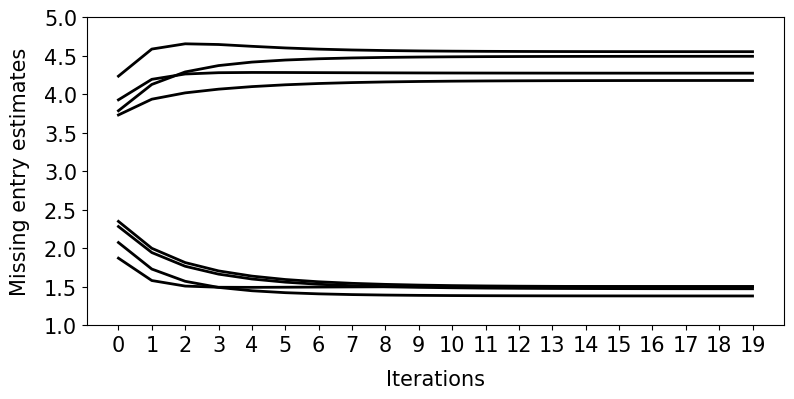

In [8]:
n_plot = 20
print("Final estimate")
print(np.round(estimate,2))
plt.figure(figsize=(9,4))
plt.ylabel('Missing entry estimates',fontsize=font_size,labelpad=10)
plt.xlabel('Iterations',fontsize=font_size,labelpad=10)
plt.xticks(range(n_plot),fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([1,5])
for ind in range(n_missing):
    plt.plot(estimate_missing[:n_plot,ind],lw=2,color="black")

## 